# Word Representation

### One Hot Vector를 통한 출력

In [30]:
from konlpy.tag import Mecab

qna_data = [
                ['안녕', '만나서 반가워']
                ,['넌누구니', '나는 AI 봇이란다.']
#                 ,['피자 주문 할께', '페파로니 주문해줘']
#                ,['음료는 멀로', '콜라로 해줘']
            ]
mecab = Mecab('/usr/local/lib/mecab/dic/mecab-ko-dic')

train_data = list(map(lambda x : mecab.morphs(' '.join(x)) , qna_data))

import itertools
train_data = list(itertools.chain.from_iterable(train_data))
print(list(train_data))

['안녕', '만나', '서', '반가워', '넌', '누구', '니', '나', '는', 'AI', '봇', '이', '란다', '.']


In [40]:
import numpy as np
bucket = np.zeros(len(train_data), dtype=np.float)

for word in train_data :
    bucket_temp = bucket.copy()
    np.put(bucket_temp, train_data.index(word), 1)
    print(bucket_temp)

[ 1.]


## Word to Vector (By Gensim)
### W2V를 통해 출력해보자

In [32]:
from gensim.models import word2vec

In [33]:
train_data = [train_data]
print(train_data)

model = word2vec.Word2Vec(size=50, window=2, min_count=1)
model.build_vocab(train_data)
model.train(train_data)
print("model check : {0}".format(model))

[['안녕', '만나', '서', '반가워', '넌', '누구', '니', '나', '는', 'AI', '봇', '이', '란다', '.']]
model check : Word2Vec(vocab=14, size=50, alpha=0.025)


In [34]:
import os  
file_path = './model'
if not os.path.exists(file_path):
    os.makedirs(file_path)
model.save(file_path + "/w2v.bin")
model = word2vec.Word2Vec.load("./model/w2v.bin")
print("model load check : {0}".format(model))

model load check : Word2Vec(vocab=14, size=50, alpha=0.025)


In [35]:
print(model.wv.index2word)
X = model[vocab]

['나', '넌', '안녕', '만나', '.', 'AI', '니', '서', '이', '반가워', '봇', '란다', '누구', '는']


### 안녕, AI등 값의 Vector값 출력 

In [36]:
print(model['안녕'])

[ 0.00981055  0.00837493 -0.00519899  0.00814067 -0.00932563  0.00047294
  0.00447544 -0.00191654  0.00691165 -0.0016972   0.00735477  0.00649649
 -0.00619209 -0.00202448 -0.0084839   0.00173509  0.00453351  0.0029588
 -0.00383835 -0.00476019 -0.00636359  0.0018871   0.00240419  0.00092022
 -0.00343528  0.00975673 -0.0046457  -0.00628544  0.00173351 -0.00401808
  0.00313213  0.00499288  0.00913336  0.00619573  0.00881665 -0.00881503
  0.00838484 -0.00702973  0.00564422  0.00956812 -0.00832732  0.00674114
  0.0077254   0.00829423 -0.00335234 -0.00602374  0.00395778  0.00404287
 -0.00606439 -0.00252962]


In [37]:
print(model['AI'])

[ -9.34641715e-03  -6.11009588e-03   1.39796862e-03   1.25339755e-03
   4.03479906e-03   3.05280974e-03  -7.33010145e-03   3.04443133e-03
   4.21165489e-03  -4.82020015e-03  -5.34636574e-03  -2.79347948e-03
   2.08400236e-03   2.90282769e-03  -8.51213187e-03  -8.32745619e-03
  -8.43572058e-03   2.70558544e-03  -5.06359106e-03   5.41312853e-03
  -3.80716473e-03  -4.31978609e-03   7.79386936e-03  -1.04027113e-03
   9.61077306e-03   4.17589836e-05   1.87450449e-03  -7.03275669e-03
   2.62490707e-03   7.84369465e-03  -4.51481063e-03   1.64743816e-03
   6.01033028e-03  -6.65485859e-03   1.22951067e-04   5.86690940e-03
  -9.70315840e-03   5.78729669e-03  -4.95112268e-04  -2.06105900e-03
   7.61175703e-04  -6.91566337e-03  -1.04927144e-03  -5.83795784e-03
  -9.96826589e-03  -8.77221301e-03   8.81683268e-03  -8.96399654e-03
   1.79362472e-03   1.65759935e-03]


In [38]:
result1 = model.most_similar(positive='나', negative='', topn=10)
print(result1)

[('반가워', 0.225311279296875), ('서', 0.11470388621091843), ('AI', 0.07287528365850449), ('누구', 0.05710681900382042), ('봇', -0.05507016181945801), ('.', -0.061081256717443466), ('안녕', -0.07597370445728302), ('란다', -0.11317567527294159), ('니', -0.11470992118120193), ('넌', -0.14514467120170593)]


           x         y word
0   0.000057  0.000007    나
1   0.000002 -0.000190    넌
2   0.000005 -0.000085   안녕
3  -0.000126 -0.000005   만나
4  -0.000160 -0.000086    .
5   0.000003 -0.000123   AI
6   0.000139  0.000065    니
7   0.000036 -0.000146    서
8   0.000012  0.000214    이
9   0.000135 -0.000052  반가워
10  0.000104 -0.000007    봇
11  0.000156 -0.000027   란다
12  0.000007  0.000214   누구
13 -0.000125 -0.000079    는


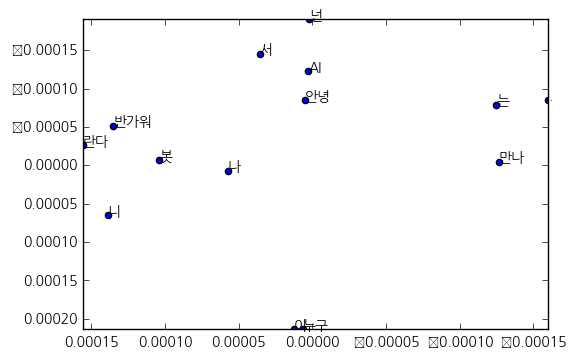

In [39]:
from sklearn.manifold import TSNE
import pandas as pd
import matplotlib.pyplot as plt


font_name = matplotlib.font_manager.FontProperties(
                fname="/usr/share/fonts/truetype/nanum/NanumGothic.ttf"  # 한글 폰트 위치를 넣어주세요
            ).get_name()
vocab = model.wv.index2word
matplotlib.rc('font', family=font_name)
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X) #t-분포 확률적 임베딩(t-SNE)은 데이터의 차원 축소에 사용
df = pd.concat([pd.DataFrame(X_tsne),
                pd.Series(vocab)],
               axis=1)

df.columns = ['x', 'y', 'word']
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
print(df)
ax.scatter(df['x'], df['y'])
ax.set_xlim(df['x'].max(), df['x'].min())
ax.set_ylim(df['y'].max(), df['y'].min())
for i, txt in enumerate(df['word']):
    ax.annotate(txt, (df['x'].iloc[i], df['y'].iloc[i]))
plt.show()